In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Скачиваем базу данных digits при помощи функции load_digits.

In [2]:
digits = load_digits()
X = digits['data']
labels = digits['target']

Нарисуем несколько картинок из X, воспользовавшись функцией matplotlib.pyplot.imshow

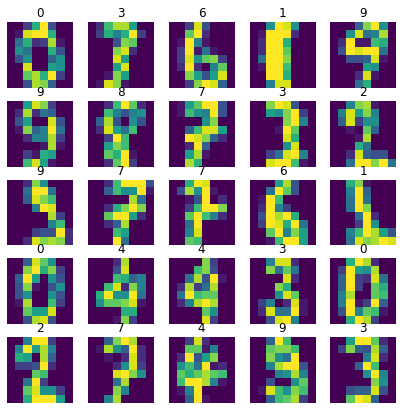

In [3]:
fig, axs = plt.subplots(5, 5, figsize=(7, 7))
for i in range(5):
    for j in range(5):
        k = np.random.randint(0, 1797)
        axs[i, j].imshow(X[k, :].reshape(8, 8))
        axs[i, j].set_title(labels[k])
        axs[i, j].axis('off')

**Алгоритм PCA.**

Метод главных компонент состоит из следующих 4-х шагов:
1. Центрирование данных.
2. Вычисление матрицы ковариации.
3. Вычисление собственных векторов и значений матрицы ковариации.
4. Преобразование данных в координаты в базисе главных компонент.

In [3]:
class my_PCA():
    def __init__(self, n_components=None):
        self.n_components = n_components
    
    def fit(self, X):
        X -= X.mean(axis=0)
        C = np.dot(X.T, X)
        l, F = np.linalg.eigh(C)
        l = l[::-1]
        F = F[:, ::-1]
        return X, F, l
    
    def transform(self, X, F):
        return np.dot(X, F)
    
    def fit_transform(self, X):
        Xc, F, l = self.fit(X)
        Y = self.transform(Xc, F)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y

График собственных значений.

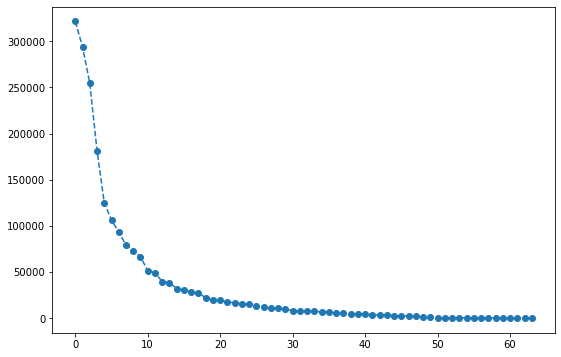

In [27]:
b = my_PCA(2)
_, _, l = b.fit(X)
plt.figure(figsize=(9, 6))
plt.plot(l, marker='o', linestyle='--')

График отношения кумулятивной суммы собственных значений к их полной сумме.

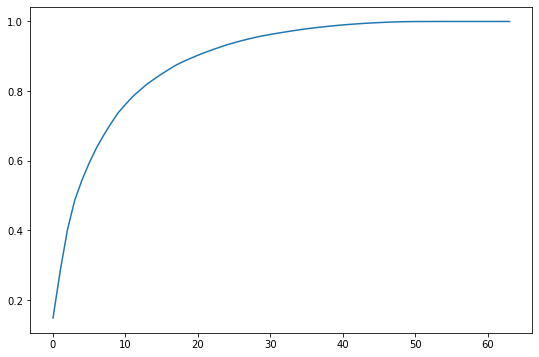

In [26]:
plt.figure(figsize=(9, 6))
plt.plot(np.cumsum(l) / np.sum(l))

Изобразим на графике точки датасета в первых двух координатах главных компонент.

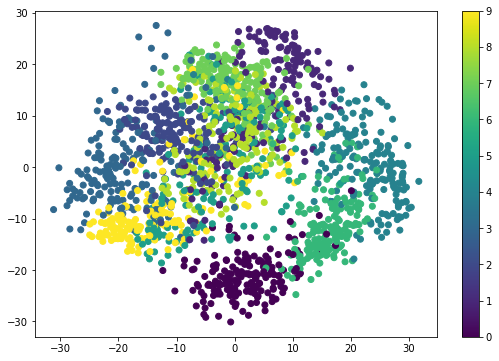

In [34]:
y = b.fit_transform(X)
plt.figure(figsize=(9, 6))
plt.scatter(y[:, 0], y[:, 1], c=labels)
plt.colorbar()

**Алгоритм kNN.**

Алгоритм k-ближайших соседей (k-nearest neighbours (kNN)) является одним из простейших метрических алгоритмов для решения задач классификации объектов. Суть его в следующем:

Пусть у нас есть X_train - некоторая обучающая выборка данных с известными классами принадлежности объектов y_train. Предположим, есть некоторый объект с неизвестным классом, который мы хотели бы предсказать. Посчитаем расстояния от этого объекта до каждого из объектов X_train и найдём k-ближайших (т.е. с наименьшим расстоянием) из этого набора. Мы знаем к какому классу принадлежат эти k соседей, значит, мы можем предположить, что и наш объект будет принадлежать к тому классу, из которого наибольшее количество соседей.

In [4]:
class my_kNN():
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        
    def fit(self, X_train, labels_train):
        self.X_train = X_train
        self.labels_train = labels_train
        
    def predict(self, X):
        classes = []
        for x in X:
            distance = []
            for x_train in self.X_train:
                distance.append(np.linalg.norm(x - x_train))
            distance_sort = np.argsort(distance)
            neighbors = distance_sort[:self.n_neighbors]
        
            neighbors_classes = []
            for i in neighbors:
                neighbors_classes.append(self.labels_train[i])
            classes.append(max(neighbors_classes, key=neighbors_classes.count))
        return classes

Создадим классификатор my_kNN с числом соседей равным 5 и обучим его на обучающих данных.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

In [34]:
kNN = my_kNN(5)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
print('Точность алгоритма:', accuracy_score(y_test, y_pred) * 100)

Точность алгоритма: 99.07407407407408


Применим алгоритм k ближайших соседей к данным, преобразованным с помощью метода главных компонент. Попробуем разное количество соседей (от 1 до 30) и разное количество компонент (от 1 до 64).

In [5]:
for i in range(1, 65):
    PCA = my_PCA(i)
    X_transformed = PCA.fit_transform(X)
    print('Количество главных компонент:', i)
    for j in range(1, 31):
        X_train, X_test, y_train, y_test = train_test_split(X_transformed, labels, test_size=0.3, random_state=42)
        kNN = my_kNN(j)
        kNN.fit(X_train, y_train)
        y_pred = kNN.predict(X_test)
        print('Количество соседей:', j, 'Точность:', accuracy_score(y_test, y_pred) * 100)

Количество главных компонент: 1
Количество соседей: 1 Точность: 28.14814814814815
Количество соседей: 2 Точность: 28.14814814814815
Количество соседей: 3 Точность: 27.77777777777778
Количество соседей: 4 Точность: 29.629629629629626
Количество соседей: 5 Точность: 31.296296296296294
Количество соседей: 6 Точность: 32.592592592592595
Количество соседей: 7 Точность: 32.03703703703704
Количество соседей: 8 Точность: 32.03703703703704
Количество соседей: 9 Точность: 32.77777777777778
Количество соседей: 10 Точность: 33.33333333333333
Количество соседей: 11 Точность: 34.44444444444444
Количество соседей: 12 Точность: 35.55555555555556
Количество соседей: 13 Точность: 35.55555555555556
Количество соседей: 14 Точность: 35.92592592592593
Количество соседей: 15 Точность: 36.666666666666664
Количество соседей: 16 Точность: 37.22222222222222
Количество соседей: 17 Точность: 35.92592592592593
Количество соседей: 18 Точность: 36.48148148148148
Количество соседей: 19 Точность: 38.148148148148145
Кол

Количество соседей: 11 Точность: 92.96296296296296
Количество соседей: 12 Точность: 93.14814814814815
Количество соседей: 13 Точность: 92.96296296296296
Количество соседей: 14 Точность: 92.5925925925926
Количество соседей: 15 Точность: 92.5925925925926
Количество соседей: 16 Точность: 92.77777777777779
Количество соседей: 17 Точность: 93.14814814814815
Количество соседей: 18 Точность: 93.14814814814815
Количество соседей: 19 Точность: 93.33333333333333
Количество соседей: 20 Точность: 93.33333333333333
Количество соседей: 21 Точность: 93.14814814814815
Количество соседей: 22 Точность: 93.14814814814815
Количество соседей: 23 Точность: 92.4074074074074
Количество соседей: 24 Точность: 92.5925925925926
Количество соседей: 25 Точность: 92.77777777777779
Количество соседей: 26 Точность: 92.4074074074074
Количество соседей: 27 Точность: 92.03703703703704
Количество соседей: 28 Точность: 92.22222222222223
Количество соседей: 29 Точность: 92.4074074074074
Количество соседей: 30 Точность: 92.0

Количество соседей: 23 Точность: 96.29629629629629
Количество соседей: 24 Точность: 96.11111111111111
Количество соседей: 25 Точность: 95.92592592592592
Количество соседей: 26 Точность: 95.18518518518519
Количество соседей: 27 Точность: 95.37037037037037
Количество соседей: 28 Точность: 95.37037037037037
Количество соседей: 29 Точность: 95.37037037037037
Количество соседей: 30 Точность: 95.55555555555556
Количество главных компонент: 12
Количество соседей: 1 Точность: 98.14814814814815
Количество соседей: 2 Точность: 98.14814814814815
Количество соседей: 3 Точность: 98.33333333333333
Количество соседей: 4 Точность: 98.70370370370371
Количество соседей: 5 Точность: 98.33333333333333
Количество соседей: 6 Точность: 98.70370370370371
Количество соседей: 7 Точность: 98.33333333333333
Количество соседей: 8 Точность: 98.51851851851852
Количество соседей: 9 Точность: 98.33333333333333
Количество соседей: 10 Точность: 97.96296296296296
Количество соседей: 11 Точность: 97.77777777777777
Количес

Количество соседей: 1 Точность: 98.33333333333333
Количество соседей: 2 Точность: 98.33333333333333
Количество соседей: 3 Точность: 98.88888888888889
Количество соседей: 4 Точность: 98.70370370370371
Количество соседей: 5 Точность: 98.88888888888889
Количество соседей: 6 Точность: 98.88888888888889
Количество соседей: 7 Точность: 99.07407407407408
Количество соседей: 8 Точность: 98.88888888888889
Количество соседей: 9 Точность: 98.88888888888889
Количество соседей: 10 Точность: 98.88888888888889
Количество соседей: 11 Точность: 98.33333333333333
Количество соседей: 12 Точность: 98.70370370370371
Количество соседей: 13 Точность: 98.14814814814815
Количество соседей: 14 Точность: 97.96296296296296
Количество соседей: 15 Точность: 97.77777777777777
Количество соседей: 16 Точность: 97.5925925925926
Количество соседей: 17 Точность: 97.77777777777777
Количество соседей: 18 Точность: 97.5925925925926
Количество соседей: 19 Точность: 97.5925925925926
Количество соседей: 20 Точность: 97.4074074

Количество соседей: 10 Точность: 99.07407407407408
Количество соседей: 11 Точность: 98.88888888888889
Количество соседей: 12 Точность: 98.70370370370371
Количество соседей: 13 Точность: 98.33333333333333
Количество соседей: 14 Точность: 98.14814814814815
Количество соседей: 15 Точность: 97.96296296296296
Количество соседей: 16 Точность: 97.77777777777777
Количество соседей: 17 Точность: 97.5925925925926
Количество соседей: 18 Точность: 97.77777777777777
Количество соседей: 19 Точность: 97.5925925925926
Количество соседей: 20 Точность: 97.5925925925926
Количество соседей: 21 Точность: 97.4074074074074
Количество соседей: 22 Точность: 97.4074074074074
Количество соседей: 23 Точность: 97.22222222222221
Количество соседей: 24 Точность: 97.03703703703704
Количество соседей: 25 Точность: 96.66666666666667
Количество соседей: 26 Точность: 96.85185185185186
Количество соседей: 27 Точность: 96.85185185185186
Количество соседей: 28 Точность: 96.85185185185186
Количество соседей: 29 Точность: 96.

Количество соседей: 19 Точность: 97.5925925925926
Количество соседей: 20 Точность: 97.5925925925926
Количество соседей: 21 Точность: 97.4074074074074
Количество соседей: 22 Точность: 97.22222222222221
Количество соседей: 23 Точность: 97.03703703703704
Количество соседей: 24 Точность: 97.03703703703704
Количество соседей: 25 Точность: 96.66666666666667
Количество соседей: 26 Точность: 96.29629629629629
Количество соседей: 27 Точность: 96.48148148148148
Количество соседей: 28 Точность: 96.48148148148148
Количество соседей: 29 Точность: 96.48148148148148
Количество соседей: 30 Точность: 96.48148148148148
Количество главных компонент: 28
Количество соседей: 1 Точность: 98.88888888888889
Количество соседей: 2 Точность: 98.88888888888889
Количество соседей: 3 Точность: 98.14814814814815
Количество соседей: 4 Точность: 98.88888888888889
Количество соседей: 5 Точность: 98.70370370370371
Количество соседей: 6 Точность: 99.07407407407408
Количество соседей: 7 Точность: 98.88888888888889
Количест

Количество соседей: 28 Точность: 96.66666666666667
Количество соседей: 29 Точность: 96.48148148148148
Количество соседей: 30 Точность: 96.48148148148148
Количество главных компонент: 33
Количество соседей: 1 Точность: 98.33333333333333
Количество соседей: 2 Точность: 98.33333333333333
Количество соседей: 3 Точность: 98.70370370370371
Количество соседей: 4 Точность: 99.07407407407408
Количество соседей: 5 Точность: 99.07407407407408
Количество соседей: 6 Точность: 98.70370370370371
Количество соседей: 7 Точность: 98.88888888888889
Количество соседей: 8 Точность: 98.70370370370371
Количество соседей: 9 Точность: 98.51851851851852
Количество соседей: 10 Точность: 98.70370370370371
Количество соседей: 11 Точность: 98.14814814814815
Количество соседей: 12 Точность: 97.96296296296296
Количество соседей: 13 Точность: 97.96296296296296
Количество соседей: 14 Точность: 97.77777777777777
Количество соседей: 15 Точность: 97.5925925925926
Количество соседей: 16 Точность: 97.5925925925926
Количеств

Количество соседей: 7 Точность: 98.88888888888889
Количество соседей: 8 Точность: 98.70370370370371
Количество соседей: 9 Точность: 98.33333333333333
Количество соседей: 10 Точность: 98.14814814814815
Количество соседей: 11 Точность: 98.14814814814815
Количество соседей: 12 Точность: 97.77777777777777
Количество соседей: 13 Точность: 97.77777777777777
Количество соседей: 14 Точность: 97.96296296296296
Количество соседей: 15 Точность: 97.77777777777777
Количество соседей: 16 Точность: 97.77777777777777
Количество соседей: 17 Точность: 97.5925925925926
Количество соседей: 18 Точность: 97.77777777777777
Количество соседей: 19 Точность: 97.5925925925926
Количество соседей: 20 Точность: 97.77777777777777
Количество соседей: 21 Точность: 97.22222222222221
Количество соседей: 22 Точность: 97.5925925925926
Количество соседей: 23 Точность: 97.03703703703704
Количество соседей: 24 Точность: 97.03703703703704
Количество соседей: 25 Точность: 97.03703703703704
Количество соседей: 26 Точность: 97.0

Количество соседей: 16 Точность: 97.77777777777777
Количество соседей: 17 Точность: 97.77777777777777
Количество соседей: 18 Точность: 97.77777777777777
Количество соседей: 19 Точность: 97.4074074074074
Количество соседей: 20 Точность: 97.5925925925926
Количество соседей: 21 Точность: 97.4074074074074
Количество соседей: 22 Точность: 97.4074074074074
Количество соседей: 23 Точность: 97.22222222222221
Количество соседей: 24 Точность: 97.03703703703704
Количество соседей: 25 Точность: 97.03703703703704
Количество соседей: 26 Точность: 96.85185185185186
Количество соседей: 27 Точность: 96.66666666666667
Количество соседей: 28 Точность: 96.66666666666667
Количество соседей: 29 Точность: 96.29629629629629
Количество соседей: 30 Точность: 96.48148148148148
Количество главных компонент: 44
Количество соседей: 1 Точность: 98.51851851851852
Количество соседей: 2 Точность: 98.51851851851852
Количество соседей: 3 Точность: 99.07407407407408
Количество соседей: 4 Точность: 98.88888888888889
Количе

Количество соседей: 25 Точность: 96.85185185185186
Количество соседей: 26 Точность: 96.85185185185186
Количество соседей: 27 Точность: 96.66666666666667
Количество соседей: 28 Точность: 96.66666666666667
Количество соседей: 29 Точность: 96.29629629629629
Количество соседей: 30 Точность: 96.29629629629629
Количество главных компонент: 49
Количество соседей: 1 Точность: 98.33333333333333
Количество соседей: 2 Точность: 98.33333333333333
Количество соседей: 3 Точность: 98.88888888888889
Количество соседей: 4 Точность: 98.70370370370371
Количество соседей: 5 Точность: 99.07407407407408
Количество соседей: 6 Точность: 99.07407407407408
Количество соседей: 7 Точность: 99.07407407407408
Количество соседей: 8 Точность: 98.70370370370371
Количество соседей: 9 Точность: 97.96296296296296
Количество соседей: 10 Точность: 97.96296296296296
Количество соседей: 11 Точность: 97.96296296296296
Количество соседей: 12 Точность: 97.77777777777777
Количество соседей: 13 Точность: 97.77777777777777
Количес

Количество соседей: 4 Точность: 98.70370370370371
Количество соседей: 5 Точность: 99.07407407407408
Количество соседей: 6 Точность: 99.07407407407408
Количество соседей: 7 Точность: 99.07407407407408
Количество соседей: 8 Точность: 98.70370370370371
Количество соседей: 9 Точность: 97.96296296296296
Количество соседей: 10 Точность: 97.96296296296296
Количество соседей: 11 Точность: 97.96296296296296
Количество соседей: 12 Точность: 97.77777777777777
Количество соседей: 13 Точность: 97.77777777777777
Количество соседей: 14 Точность: 97.96296296296296
Количество соседей: 15 Точность: 97.96296296296296
Количество соседей: 16 Точность: 97.77777777777777
Количество соседей: 17 Точность: 97.77777777777777
Количество соседей: 18 Точность: 97.77777777777777
Количество соседей: 19 Точность: 97.4074074074074
Количество соседей: 20 Точность: 97.5925925925926
Количество соседей: 21 Точность: 97.4074074074074
Количество соседей: 22 Точность: 97.4074074074074
Количество соседей: 23 Точность: 97.22222

Количество соседей: 13 Точность: 97.77777777777777
Количество соседей: 14 Точность: 97.96296296296296
Количество соседей: 15 Точность: 97.96296296296296
Количество соседей: 16 Точность: 97.77777777777777
Количество соседей: 17 Точность: 97.77777777777777
Количество соседей: 18 Точность: 97.77777777777777
Количество соседей: 19 Точность: 97.4074074074074
Количество соседей: 20 Точность: 97.5925925925926
Количество соседей: 21 Точность: 97.4074074074074
Количество соседей: 22 Точность: 97.4074074074074
Количество соседей: 23 Точность: 97.22222222222221
Количество соседей: 24 Точность: 97.03703703703704
Количество соседей: 25 Точность: 97.03703703703704
Количество соседей: 26 Точность: 96.85185185185186
Количество соседей: 27 Точность: 96.66666666666667
Количество соседей: 28 Точность: 96.66666666666667
Количество соседей: 29 Точность: 96.29629629629629
Количество соседей: 30 Точность: 96.29629629629629
Количество главных компонент: 60
Количество соседей: 1 Точность: 98.33333333333333
Кол

Количество соседей: 22 Точность: 97.4074074074074
Количество соседей: 23 Точность: 97.22222222222221
Количество соседей: 24 Точность: 97.03703703703704
Количество соседей: 25 Точность: 97.03703703703704
Количество соседей: 26 Точность: 96.85185185185186
Количество соседей: 27 Точность: 96.66666666666667
Количество соседей: 28 Точность: 96.66666666666667
Количество соседей: 29 Точность: 96.29629629629629
Количество соседей: 30 Точность: 96.29629629629629


Наибольшая точность достигается при 16 компонентах и 8 соседях - 99.25925925925925